# http://karpov.courses

# Midterm project: e-commerce

## Data description
### olist_customers_datase.csv - table with information about customers
* customer_id - customer identifier in the system.
* customer_unique_id - unique identifier of the customer (analog of passport number).
* customer_zip_code_prefix - customer's zip code.
* customer_city - customer's delivery city.
* customer_state - customer's delivery state.
### olist_orders_dataset.csv - table with information about orders
* order_id - unique order identifier (check number).
* customer_id - customer identifier in the system.
* order_status - order status; one of _**created, approved, invoiced, processing, shipped, delivered, unavailable, canceled**_.
* order_purchase_timestamp - order generation time.
* order_approved_at - time of order payment confirmation.
* order_delivered_carrier_date - time of order transfer to the logistics service.
* order_delivered_customer_date - time of order delivery.
* order_estimated_delivery_date - declared delivery date.
### olist_order_items_dataset.csv - table with information about products included in orders
* order_id - unique order identifier (check number).
* order_item_id - product identifier within one order.
* product_id - product id (barcode analog).
* seller_id - product manufacturer's ID.
* shipping_limit_date - latest date of delivery by the seller for transferring the order to the logistics partner.
* price - price per unit.
* freight_value - weight of the product.

## Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

import requests

## Reading the data

In [2]:
api_url = r'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
customers_url = r'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
orders_url = r'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
items_url = r'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

### Customers

In [3]:
# Get the download link
response = requests.get(api_url, params={'public_key': customers_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/7f09de6f97fd7fa5f97d3e57e1781142d1a0e7627fd0acc10be598b442c3b923/65a010d5/l9rUW5QCYE1v_Vb85lc2_FJfwWdgMJ5VjRECL1sslDo-ICZm75VRCKxmbjQzyPRm81ySmP0WwqOBn9lSniY-Lg%3D%3D?uid=0&filename=olist_customers_dataset.csv&disposition=attachment&hash=s4lUpgJ0SPJ1ON4cVah4tVvdiHo%2B%2B3rzOaw5q4yyC8iBoMstcdyRfe0vbQs5cbwxq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=9033957&hid=b675f8ba78c13d600facc03ba2033f9f&media_type=spreadsheet&tknv=v2


In [4]:
# Load data directily into pd DataFrame
customers_df = pd.read_csv(response.json()['href'])
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Are there missing values?
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Orders

In [6]:
# Get the download link
response = requests.get(api_url, params={'public_key': orders_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/425bd3b661e46381fd4e2f09a5986c3fead12c74a32be1e4c5c7a919effa2f04/65a010da/l9rUW5QCYE1v_Vb85lc2_FMCwvSWHpAnIgUxRQB6t1NE-kaLb2q1lfdqmkuuvbZRx6gQSQCHgBk324u3rpDj0Q%3D%3D?uid=0&filename=olist_orders_dataset.csv&disposition=attachment&hash=Oyo0QHlCDI8w3ue9MPByRJBzEgLum/ZNMmXWTNQWXG8TQs6QIMnsobdGPfplDa90q/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=17654914&hid=87c93f55b161ccff733960c7e368d4e8&media_type=spreadsheet&tknv=v2


In [7]:
# Load data directily into pd DataFrame
orders_df = pd.read_csv(response.json()['href'])
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Are there missing values?
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# Let's count them
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Items

In [10]:
# Get the download link
response = requests.get(api_url, params={'public_key': items_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/32b639bc1d06f0f22938673c9b7f536eb8e7dd12a78531dbab29ee234d369ee3/65a010e2/l9rUW5QCYE1v_Vb85lc2_BLqOxxhJrJbn52AF-XmD50NEbdTd8gXMRrqNXCXacfnpPZo6WuHinNd24yXhjMTJQ%3D%3D?uid=0&filename=olist_order_items_dataset.csv&disposition=attachment&hash=GOrR6hhegX%2B1xKqOtZgmA%2BI90i%2BAiYjmpnekGChzcjuNJpvFd6XAN2bd9pLlim9cq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=15438671&hid=86fa0ab2956a1f56a0c01e930a44f547&media_type=spreadsheet&tknv=v2


In [11]:
# Load data directily into pd DataFrame
items_df = pd.read_csv(response.json()['href'])
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
# Are there missing values?
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
# Clean-up
del api_url, customers_url, items_url, orders_url 

## Task 1
How many users made only one purchase?

In [14]:
# There are customer_unique_id that correspond to more than one customer_id.
print('\ncustomers_df:')
print(customers_df[['customer_id', 'customer_unique_id']].nunique())


customers_df:
customer_id           99441
customer_unique_id    96096
dtype: int64


What I would consider a successful purchase:
* order_status - delivered
* order_approved_at is not **NaN** (there is information about order payment)
* order_delivered_customer_date not **NaN** (there is information about order delivery)

In [15]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Merging filtered_orders_df with customers_df and selecting only the required columns.

In [16]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df, how="inner", on="customer_id"
)[["customer_id", "customer_unique_id"]]
merged_df.head()

,customer_id,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


Search for those customer_unique_ids that match exactly 1 **customer_id** (that is, given the above code, look for people who have made exactly 1 successful purchase).

In [17]:
final_df = merged_df.groupby(by='customer_unique_id', as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id': 'N'}) \
    .query('N==1')
final_df.head()

,customer_unique_id,N
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [18]:
print('The number of customers who have made exactly one successful purchase is',
      final_df.shape[0])

The number of customers who have made exactly one successful purchase is 90537


In [19]:
# Clean-up
del filtered_orders_df, final_df, merged_df 

## Task 2
How many orders per month on average are not delivered for various reasons? Display information about these reasons.

I will consider all orders that don't have a **"delivered"** status. 
The **order_purchase_timestamp** column (of **orders_df**) containing creation dates of orders will be used as a basis for averaging orders by months.

In [20]:
filtered_orders_df = orders_df.query('order_status!="delivered"')[
    ["order_id", "order_status", "order_purchase_timestamp"]
]
filtered_orders_df.info()  # no NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 2963 entries, 6 to 99415
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  2963 non-null   object
 1   order_status              2963 non-null   object
 2   order_purchase_timestamp  2963 non-null   object
dtypes: object(3)
memory usage: 92.6+ KB


Need to convert **order_purchase_timestamp** to datetime and extract dates as strings in year / month format.

In [21]:
filtered_orders_df["order_purchase_timestamp"] = pd.to_datetime(
    filtered_orders_df["order_purchase_timestamp"]
)
filtered_orders_df["year_month"] = filtered_orders_df[
    "order_purchase_timestamp"
].dt.strftime("%Y/%m")

Checking the result.

In [22]:
filtered_orders_df.head()

,order_id,order_status,order_purchase_timestamp,year_month
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017/04
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018/06
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018/08
128,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017/09
154,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018/01


In [23]:
filtered_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2963 entries, 6 to 99415
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  2963 non-null   object        
 1   order_status              2963 non-null   object        
 2   order_purchase_timestamp  2963 non-null   datetime64[ns]
 3   year_month                2963 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 115.7+ KB


Next, I count the number of orders with different statuses that were created in a given month. For convenience and clarity, the result was reshaped using the pivot function. 
Since NaN in this table is equal to 0 and mean values will be considered in the following cells, the fillna function was applied.

In [24]:
date_status_n = (
    filtered_orders_df.groupby(by=["year_month", "order_status"], as_index=False)
    .agg({"order_id": "count"})
    .rename(columns={"order_id": "n"})
    .pivot(columns='order_status', index='year_month', values='n')
    .fillna(value=0,)
    .sort_index()
)
date_status_n.columns.name = 'occurrences'
date_status_n.head()

occurrences,approved,canceled,created,invoiced,processing,shipped,unavailable
year_month,,,,,,,
2016/09,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2016/10,0.0,24.0,0.0,18.0,2.0,8.0,7.0
2017/01,0.0,3.0,0.0,12.0,9.0,16.0,10.0
2017/02,1.0,17.0,0.0,11.0,32.0,21.0,45.0
2017/03,0.0,33.0,0.0,3.0,23.0,45.0,32.0


In [25]:
# Total number of orders per month
date_status_n['total'] = date_status_n.sum(axis=1)
date_status_n.head()

occurrences,approved,canceled,created,invoiced,processing,shipped,unavailable,total
year_month,,,,,,,,
2016/09,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
2016/10,0.0,24.0,0.0,18.0,2.0,8.0,7.0,59.0
2017/01,0.0,3.0,0.0,12.0,9.0,16.0,10.0,50.0
2017/02,1.0,17.0,0.0,11.0,32.0,21.0,45.0,127.0
2017/03,0.0,33.0,0.0,3.0,23.0,45.0,32.0,136.0


First, let's visualize the number of unsuccessful orders for all months of observations. 

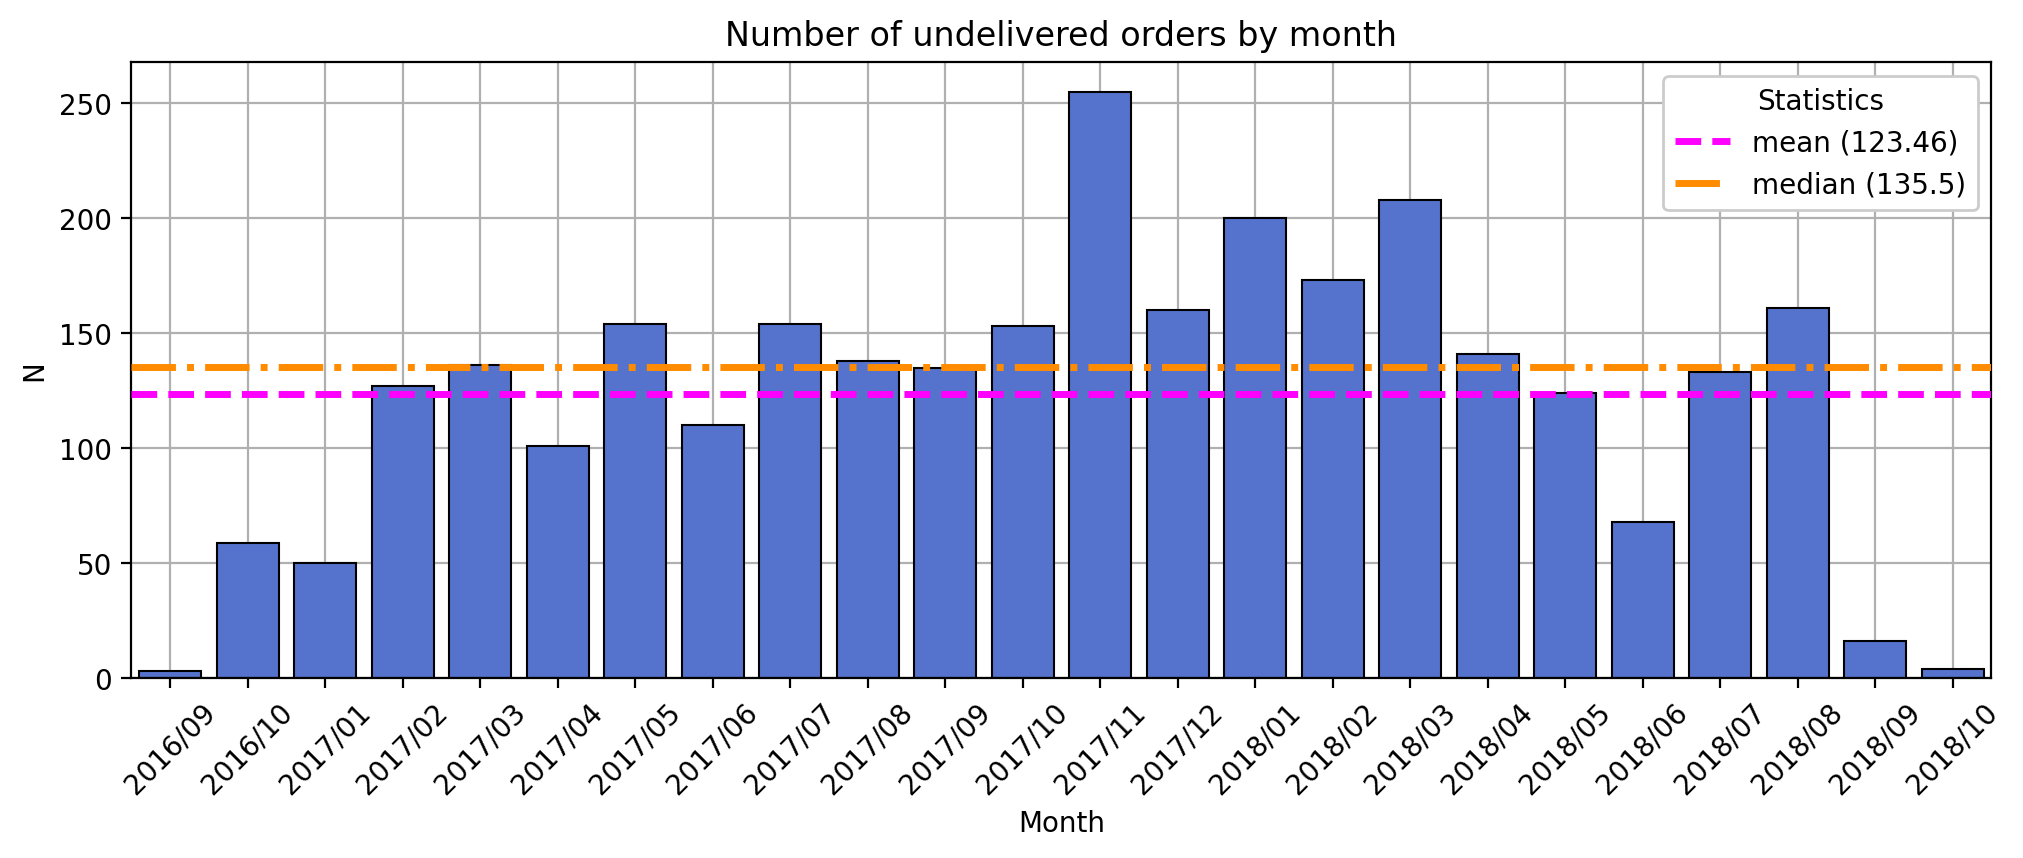

In [26]:
fig, ax = plt.subplots(dpi=200, figsize=(12, 4))
ax.axhline(date_status_n['total'].mean(), zorder=3,
           linestyle='--', linewidth=2.5, color='magenta', 
           label=f"mean ({np.round(date_status_n['total'].mean(), 2)})")
ax.axhline(date_status_n['total'].median(), zorder=3,
           linestyle='-.', linewidth=2.5, color='darkorange',
           label=f"median ({np.round(date_status_n['total'].median(), 2)})")
sns.barplot(data=date_status_n, x=date_status_n.index, y='total',
            color="royalblue", edgecolor='black', linewidth=.75,
            ax=ax, zorder=2)
ax.set(xlabel='Month', ylabel='N', title='Number of undelivered orders by month')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Statistics', framealpha=1)
ax.grid(zorder=1)
plt.show();

Now visualize monthly mean of undelivered orders with various statuses.

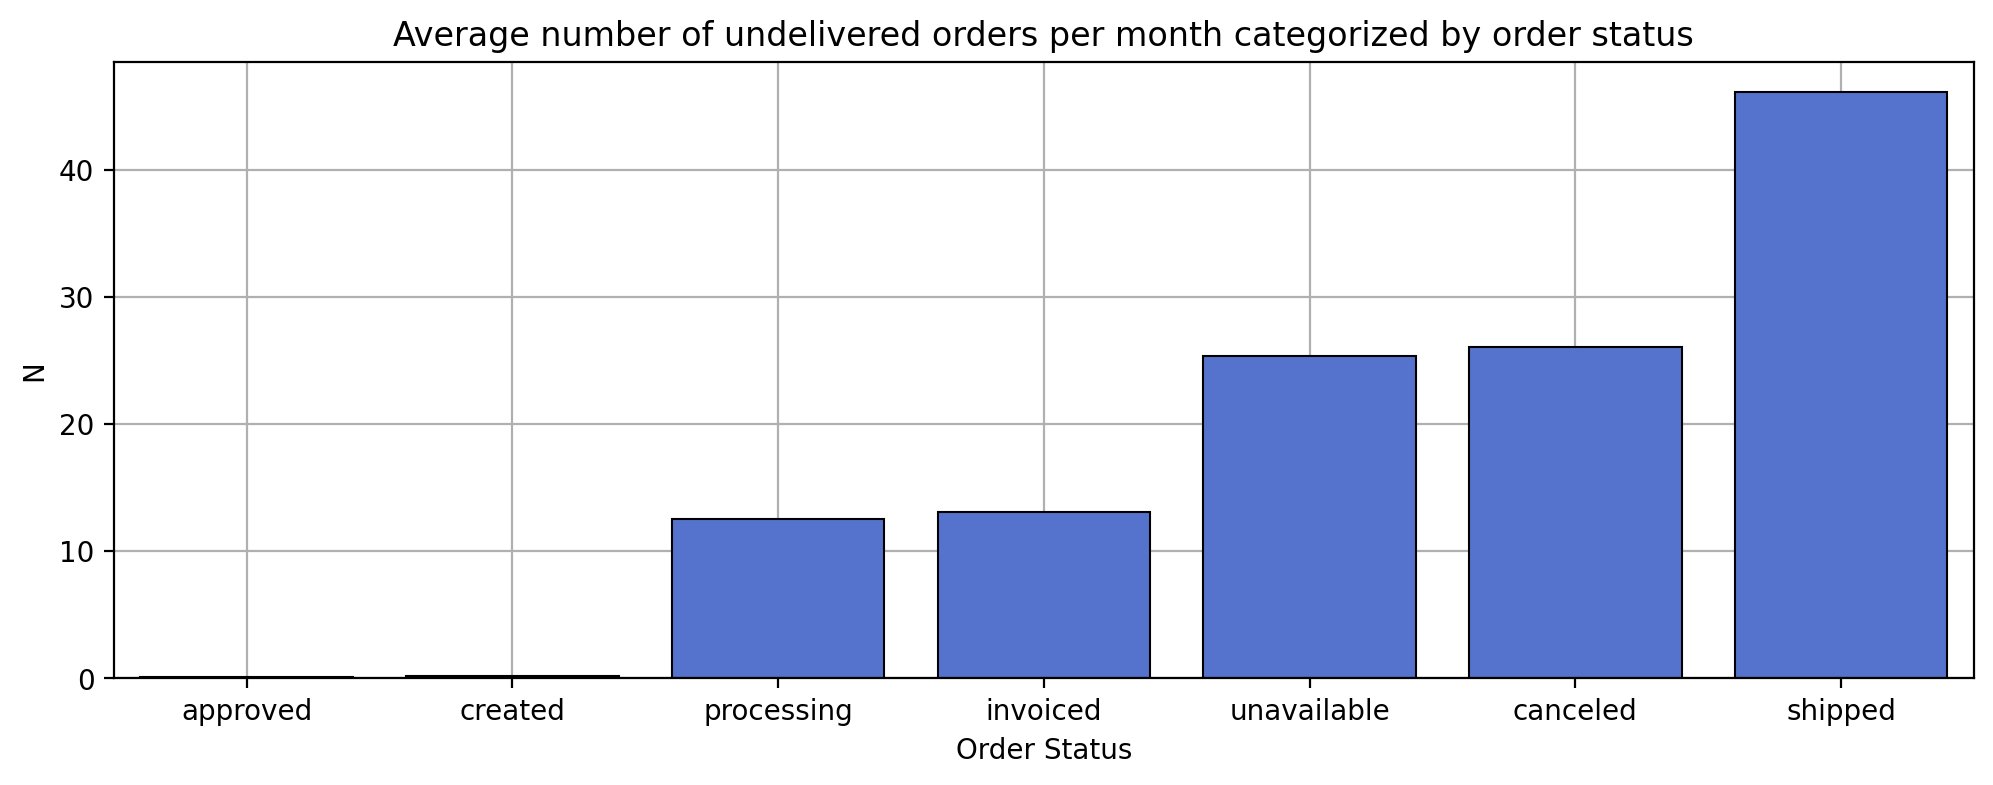

In [27]:
mean_series = date_status_n.iloc[:, :-1].mean().sort_values()

fig, ax = plt.subplots(dpi=200, figsize=(12, 4))
sns.barplot(x=mean_series.index, y=mean_series,
            color="royalblue", edgecolor='black', linewidth=.75,
            ax=ax, zorder=2)
ax.set(xlabel='Order Status', ylabel='N',
       title='Average number of undelivered orders per month categorized by order status')
ax.grid(zorder=1)
plt.show();

In [28]:
# Clean-up
del date_status_n, filtered_orders_df, mean_series

## Task 3
Identify which day of the week each product is bought most often.

As in the first task, let's assume that a purchase is successful if:
* order_status - delivered
* order_approved_at is not **NaN** (there is information about order payment)
* order_delivered_customer_date not **NaN** (there is information about order delivery)

In [29]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Merge the table with successful orders with the table containing information about the items in each order. Select only relevant columns.

In [30]:
merged_df=pd.merge(left=filtered_orders_df, right=items_df, how='inner',
         on='order_id')[['order_id', 'order_purchase_timestamp', 'product_id']]

Checking the result. 

In [31]:
merged_df.tail()

,order_id,order_purchase_timestamp,product_id
110169,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923
110170,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad
110171,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4
110172,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4
110173,66dea50a8b16d9b4dee7af250b4be1a5,2018-03-08 20:57:30,006619bbed68b000c8ba3f8725d5409e


In [32]:
merged_df.info()  # no NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110174 entries, 0 to 110173
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   order_id                  110174 non-null  object
 1   order_purchase_timestamp  110174 non-null  object
 2   product_id                110174 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


Extract the day of the week from the **order_purchase_timestamp** column, save the result to weekday. Discard the **order_purchase_timestamp** column.

In [33]:
merged_df['weekday'] = pd.to_datetime(merged_df.order_purchase_timestamp) \
    .dt.strftime('%A')
merged_df.drop(columns='order_purchase_timestamp', inplace=True)
merged_df.head()

,order_id,product_id,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


Calculating the number of products purchases by day of the week and checking the resulting table.

In [34]:
temp = merged_df.groupby(by=['product_id', 'weekday']).agg({'order_id':'count'}) \
    .rename(columns={'order_id':'purchases'})
temp.head(10)

purchases
product_id                       weekday             
00066f42aeeb9f3007548bb9d3f33c38 Sunday             1
00088930e925c41fd95ebfe695fd2655 Tuesday            1
0009406fd7479715e4bef61dd91f2462 Thursday           1
000b8f95fcb9e0096488278317764d19 Friday             1
                                 Wednesday          1
000d9be29b5207b54e86aa1b1ac54872 Tuesday            1
0011c512eb256aa0dbbb544d8dffcf6e Thursday           1
00126f27c813603687e6ce486d909d01 Sunday             2
001795ec6f1b187d37335e1c4704762e Monday             2
                                 Saturday           3

In [35]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 59940 entries, ('00066f42aeeb9f3007548bb9d3f33c38', 'Sunday') to ('fffe9eeff12fcbd74a2f2b007dde0c58', 'Wednesday')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   purchases  59940 non-null  int64
dtypes: int64(1)
memory usage: 895.7+ KB


Selecting for each product the day of the week with the maximum number of purchases (if the product was bought every day the same number of times, the first appearance is selected).

In [36]:
final_df = temp.loc[temp.groupby(level=0)['purchases'].idxmax()] \
    .sort_values(by='purchases', ascending=False)
final_df.head(10)

,,purchases
product_id,weekday,
422879e10f46682990de24d770e7f83d,Wednesday,93
99a4788cb24856965c36a24e339b6058,Monday,91
aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
368c6c730842d78016ad823897a372db,Friday,67
389d119b48cf3043d311335e499d9c6b,Thursday,67
53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
d1c427060a0f73f6b889a5c7c61f2ac4,Monday,62
3dd2a17168ec895c781a9191c1e95ad7,Wednesday,53


Sanity checks:
* each **product_id** corresponds to one value from the purchases column.
* the **final_df** table is smaller than all previous tables.

In [37]:
final_df.reset_index() \
    .groupby(as_index=False, by='product_id').agg({'purchases': 'count'}) \
    .nunique()

product_id    32211
purchases         1
dtype: int64

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32211 entries, ('422879e10f46682990de24d770e7f83d', 'Wednesday') to ('fffe9eeff12fcbd74a2f2b007dde0c58', 'Wednesday')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   purchases  32211 non-null  int64
dtypes: int64(1)
memory usage: 597.8+ KB


In [39]:
# Clean-up
del filtered_orders_df, final_df, merged_df, temp 

## Task 4
How many purchases does each user have on average per week (by month)?

**NOTE**: there may not be an integer number of weeks within a month. For example, in November 2021, there are 4.28 weeks.

Again, let's assume that a purchase is successful if:
* order_status - delivered
* order_approved_at is not **NaN** (there is information about order payment)
* order_delivered_customer_date not **NaN** (there is information about order delivery)

In [40]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Merging **filtered_orders_df** with **customers_df** and selecting only the required columns.

In [41]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df, how="inner", on="customer_id"
)[["customer_unique_id", "order_id", "order_purchase_timestamp"]]
merged_df.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


Let's find how many purchases each user made in any given month.

In [42]:
# convert string to datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(
    merged_df['order_purchase_timestamp']
)
# convert datetime to "year-month" string 
merged_df['year_month'] = merged_df['order_purchase_timestamp'] \
    .dt.strftime("%Y-%m")
# group, aggregate and sort
final_df = merged_df.groupby(by=["customer_unique_id", "year_month"],
                             as_index=False) \
    .agg({"order_id": "count"}) \
    .rename(columns={"order_id":"purchases"}) \
    .sort_values(by='purchases', ascending=False)
final_df.head(10)

,customer_unique_id,year_month,purchases
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6
23216,3e43e6105506432c953e165fb2acf44c,2018-02,4
49114,83e7958a94bd7f74a9414d8782f87628,2017-01,4
74544,c8460e4251689ba205045f3ea17884a1,2018-08,4
60358,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4
14054,25a560b9a6006157838aab1bdbd68624,2017-04,4
65758,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4
67347,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4
14155,25f3cf83109f636d52d288fa4e797111,2018-02,3
67855,b64ebaf3d11b7209fe566364cc359a51,2017-07,3


Check out how many days and weeks there were in each relevant month.

In [43]:
final_df['days_in_month'] = pd.to_datetime(final_df['year_month']).dt.daysinmonth
final_df['weeks_in_month'] = (final_df['days_in_month'] / 7).round(3)
final_df.head(10)

,customer_unique_id,year_month,purchases,days_in_month,weeks_in_month
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31,4.429
23216,3e43e6105506432c953e165fb2acf44c,2018-02,4,28,4.000
49114,83e7958a94bd7f74a9414d8782f87628,2017-01,4,31,4.429
74544,c8460e4251689ba205045f3ea17884a1,2018-08,4,31,4.429
60358,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,28,4.000
14054,25a560b9a6006157838aab1bdbd68624,2017-04,4,30,4.286
65758,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,30,4.286
67347,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,28,4.000
14155,25f3cf83109f636d52d288fa4e797111,2018-02,3,28,4.000
67855,b64ebaf3d11b7209fe566364cc359a51,2017-07,3,31,4.429


Now, to get the average number of (successful) purchases made by a user in a particular month, execute the following code:

In [44]:
final_df["avg_weekly_purchases"] = (
    final_df["purchases"] / final_df["weeks_in_month"]
).round(3)
final_df.head(3)

,customer_unique_id,year_month,purchases,days_in_month,weeks_in_month,avg_weekly_purchases
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31,4.429,1.355
23216,3e43e6105506432c953e165fb2acf44c,2018-02,4,28,4.000,1.000
49114,83e7958a94bd7f74a9414d8782f87628,2017-01,4,31,4.429,0.903


In [45]:
# Clean-up
del final_df, filtered_orders_df, merged_df

## Task 5
Perform a cohort analysis of users. Between January and December, identify the cohort with the highest retention for the 3rd month.

In this task, all calculations are done using only successful purchases. A purchase is considered successful if:
* order_status - delivered
* order_approved_at is not **NaN** (there is information about order payment)
* order_delivered_customer_date not **NaN** (there is information about order delivery)

In [46]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Combine the dataframe containing order information with the dataframe containing customer information.
Select only the required columns from the result.

In [47]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df, how="inner", on="customer_id"
)[["customer_unique_id", "order_purchase_timestamp"]]
merged_df.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


Data about the date of (successful) purchase is stored in text format - convert it to datetime and save it in a new column **purchase_timestamp**. I also save in the **purchase_month** column the text information about the month in which a specific purchase was made. 

Based on the task conditions and available data, the cohort analysis is only required for 2017.
Therefore, data for other periods were removed from the **merged_df** dataframe along with the **order_purchase_timestamp** column.

In [48]:
# convert string to datetime
merged_df['purchase_timestamp'] = pd.to_datetime(
    merged_df['order_purchase_timestamp']
)
# convert datetime to "year-month" string 
merged_df['purchase_month'] = merged_df['purchase_timestamp'] \
    .dt.strftime("%Y-%m")
# exclusion of unneeded data
merged_df = merged_df[merged_df["purchase_timestamp"].dt.year==2017]
merged_df.drop(columns='order_purchase_timestamp', inplace=True)
merged_df.head()

,customer_unique_id,purchase_timestamp,purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05,2017-07
6,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:10:30,2017-05
7,39382392765b6dc74812866ee5ee92a7,2017-01-23 18:29:09,2017-01


When did a particular user make their first documented successful purchase?

In [49]:
first_purchases = merged_df.groupby('customer_unique_id') \
    .agg({"purchase_timestamp": "min"}) \
    .rename(columns={"purchase_timestamp": "first_purchase_timestamp"})
first_purchases.head()

,first_purchase_timestamp
customer_unique_id,
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12
0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10


Adding information about first purchases to **merged_df** in two formats - text and datetime.

In [50]:
merged_df = pd.merge(merged_df, first_purchases, how="left",
                     left_on="customer_unique_id", right_index=True)
# convert datetime to "year-month" string 
merged_df['first_purchase_month'] = merged_df['first_purchase_timestamp'] \
    .dt.strftime("%Y-%m")
merged_df.head()

,customer_unique_id,purchase_timestamp,purchase_month,first_purchase_timestamp,first_purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-09-04 11:26:38,2017-09
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18 19:28:06,2017-11
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05,2017-07,2017-07-09 21:57:05,2017-07
6,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:10:30,2017-05,2017-05-16 13:10:30,2017-05
7,39382392765b6dc74812866ee5ee92a7,2017-01-23 18:29:09,2017-01,2017-01-23 18:29:09,2017-01


It can be seen that repeat purchases were often made not just in the same month, but with a difference of a few minutes. 
This is one of the reasons why in the next cell the aggregation is performed by the function **nunique**.  

In [51]:
(merged_df[["customer_unique_id", "purchase_timestamp", "first_purchase_timestamp"]]) \
    [merged_df['customer_unique_id']=='12f5d6e1cbf93dafd9dcc19095df0b3d'] \
    .sort_values(by='purchase_timestamp')

,customer_unique_id,purchase_timestamp,first_purchase_timestamp
79959,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:18:03,2017-01-05 14:18:03
4580,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:22:02,2017-01-05 14:18:03
79036,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:23:54,2017-01-05 14:18:03
34742,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:50:54,2017-01-05 14:18:03
27190,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 15:25:04,2017-01-05 14:18:03
909,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 15:25:10,2017-01-05 14:18:03


Identification of user cohorts and their monthly variations.

In [52]:
temp_1 = merged_df.groupby(by=['first_purchase_month', 'purchase_month'], as_index=False) \
    .agg({"customer_unique_id": "nunique"}) \
    .rename(columns={"customer_unique_id": "unique_customers"})
temp_1.head(11)

,first_purchase_month,purchase_month,unique_customers
0,2017-01,2017-01,716
1,2017-01,2017-02,2
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
5,2017-01,2017-06,1
6,2017-01,2017-07,3
7,2017-01,2017-08,1
8,2017-01,2017-09,1
9,2017-01,2017-11,3


Determining the initial size of each cohort.

In [53]:
temp_2 = temp_1.groupby(by=['first_purchase_month'], as_index=False) \
    .agg({"unique_customers":"max"}) \
    .rename(columns={"unique_customers": "cohort_size"})
temp_2

,first_purchase_month,cohort_size
0,2017-01,716
1,2017-02,1616
2,2017-03,2503
3,2017-04,2257
4,2017-05,3450
5,2017-06,3037
6,2017-07,3753
7,2017-08,4057
8,2017-09,4005
9,2017-10,4329


Merging of **temp_1** and **temp_2**

In [54]:
cohorts_df = pd.merge(temp_1, temp_2, how="left", on="first_purchase_month")

Define the **cohort_period** column as the difference between the month in which the current purchase was made and the month in which the first documented purchase was made.

In [55]:
cohorts_df["cohort_period"] = (
    pd.to_datetime(cohorts_df["purchase_month"]).dt.month
    - pd.to_datetime(cohorts_df["first_purchase_month"]).dt.month
)

Calculation of retention as the rate of unique users for the current month to the initial number of unique users in the first month.

In [56]:
cohorts_df['retention'] = (cohorts_df.unique_customers / cohorts_df.cohort_size)
cohorts_df.rename(columns={"first_purchase_month":"cohort"}, inplace=True)
cohorts_df.head(20)

,cohort,purchase_month,unique_customers,cohort_size,cohort_period,retention
0,2017-01,2017-01,716,716,0,1.000000
1,2017-01,2017-02,2,716,1,0.002793
2,2017-01,2017-03,2,716,2,0.002793
3,2017-01,2017-04,1,716,3,0.001397
4,2017-01,2017-05,3,716,4,0.004190
5,2017-01,2017-06,1,716,5,0.001397
6,2017-01,2017-07,3,716,6,0.004190
7,2017-01,2017-08,1,716,7,0.001397
8,2017-01,2017-09,1,716,8,0.001397
9,2017-01,2017-11,3,716,10,0.004190


Let's visualize the result (in percents).

Using the pandas table style setting tools leads to unexpected results - the color map behaves incorrectly: 

In [57]:
retention_table = pd.pivot(data=cohorts_df, index='cohort', columns='cohort_period', values='retention')
ur_style = (retention_table
            .style
            .set_caption('User retention by cohort')
            .background_gradient(cmap='PuBu')
            .highlight_null('white')
            .format("{:.3%}", na_rep=""))
ur_style

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,100.000%,0.279%,0.279%,0.140%,0.419%,0.140%,0.419%,0.140%,0.140%,,0.419%,0.140%
2017-02,100.000%,0.186%,0.309%,0.124%,0.433%,0.124%,0.248%,0.186%,0.062%,0.186%,0.124%,
2017-03,100.000%,0.439%,0.360%,0.400%,0.360%,0.160%,0.160%,0.320%,0.320%,0.080%,,
2017-04,100.000%,0.620%,0.222%,0.177%,0.266%,0.266%,0.354%,0.310%,0.310%,,,
2017-05,100.000%,0.464%,0.464%,0.290%,0.290%,0.319%,0.406%,0.145%,,,,
2017-06,100.000%,0.494%,0.395%,0.428%,0.296%,0.395%,0.362%,,,,,
2017-07,100.000%,0.533%,0.346%,0.240%,0.293%,0.213%,,,,,,
2017-08,100.000%,0.690%,0.345%,0.271%,0.345%,,,,,,,
2017-09,100.000%,0.699%,0.549%,0.275%,,,,,,,,


Let's try seaborn:

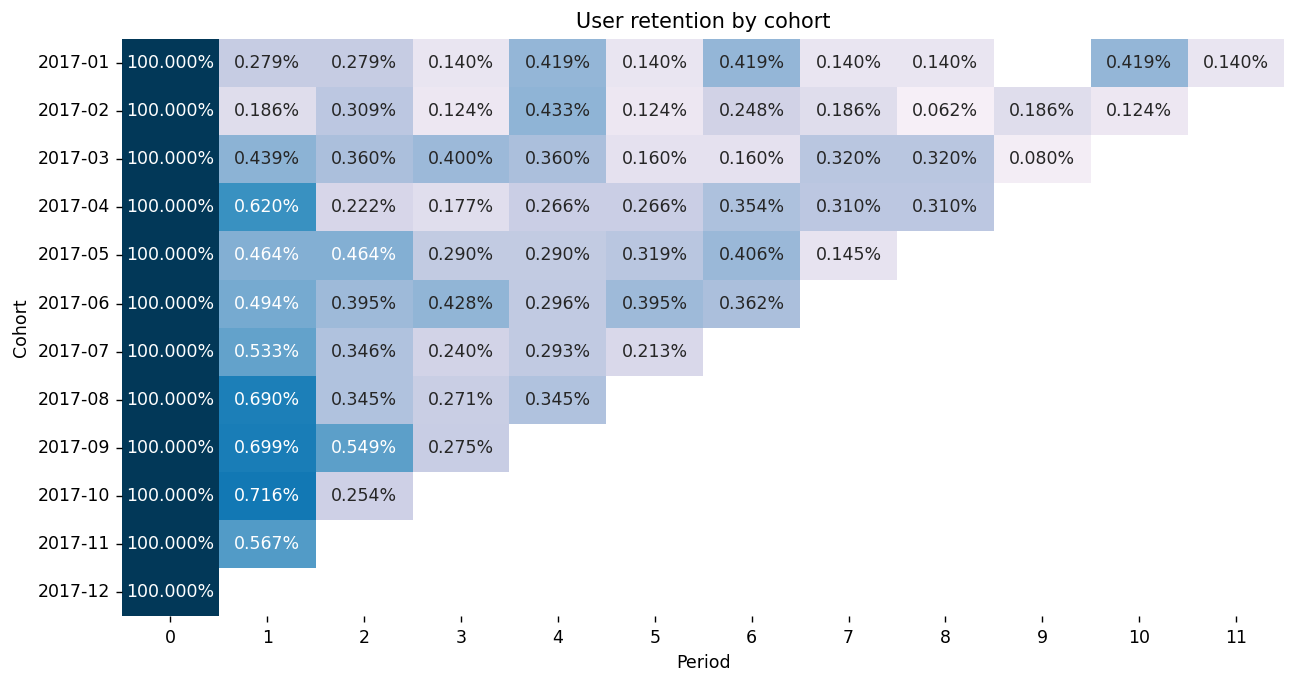

In [58]:
fig, ax = plt.subplots(dpi=125, figsize=(12, 6))
sns.heatmap(data=retention_table, annot=True, fmt='.3%',
            vmin=0.0, vmax=0.01, cmap='PuBu', cbar=False, ax=ax)
ax.set(title='User retention by cohort', xlabel='Period', ylabel='Cohort')
plt.show()


According to [this](https://lab.karpov.courses/learning/297/module/2960/lesson/26389/75100/350721/), the count starts from 0. Therefore, the required third period (month) will correspond to the 4th column. 

In [59]:
print(f"The highest retention rate on the third month is {np.round(100*retention_table[3].max(), 3)}%.",
      f"It corresponds to the {retention_table[3].idxmax()} cohort.")

The highest retention rate on the third month is 0.428%. It corresponds to the 2017-06 cohort.


In [60]:
# Clean-up
del (filtered_orders_df, merged_df, first_purchases, temp_1, temp_2, cohorts_df,
    retention_table)

## Task 6
Using python, construct an RFM segmentation of users to qualitatively assess the audience. 

The RFM method analyzes customers' behavior based on three parameters:
* R - time from the last purchase of the customer to some reference date 
* F - number of purchases made by the customer during the entire monitoring period
* M - how much money the customer has spent during the entire monitoring period

Describe the selected RFM segment boundaries and the principles used to select them.

### Data Preparation

We will only work with successful purchases, which are defined in the same way as in previous tasks.

In [61]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)[['order_id', 'customer_id', 'order_purchase_timestamp']]  # only relevant columns
# convert string to datetime
filtered_orders_df['order_purchase_timestamp'] = pd.to_datetime(filtered_orders_df['order_purchase_timestamp']) 

Let's add a column with unique user identifiers to **filtered_orders_df** and save the result to a new dataframe **merged_df**, with which we will work further.

In [62]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df[["customer_id", "customer_unique_id"]],
    how="inner", on="customer_id"
)
merged_df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6


We are going to add to **merged_df** a column with the price of each order **order_id**, which is obtained by aggregating in the **items_df** dataframe.

In [63]:
merged_df = pd.merge(merged_df,
                     items_df.groupby(by='order_id', as_index=False).agg({"price":"sum"}),
                     how="inner", on="order_id")          
merged_df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,19.90


To calculate the recency, we need to know how much time has passed from the date of purchase to some reference date.

In [64]:
reference_date = merged_df["order_purchase_timestamp"].max() + timedelta(days=1)
merged_df["days_since_order"] = (
    reference_date - merged_df["order_purchase_timestamp"]
).dt.days

Now let's calculate the recency, frequency and monetary values and save the results to a new dataframe.

In [65]:
# calculate R, M and F
rfm_df = merged_df.groupby(by='customer_unique_id', as_index=False) \
    .agg({"days_since_order": "min", "price": ["count", "sum"]})
rfm_df.columns = pd.Index(['CustomerID','Recency', 'Frequency', 'Monetary'])
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


### Calculation of R, F, M and RFM scores

To separate recency, frequency and monetary values into ranges, we will use quartiles.  

In [66]:
rfm_quartiles = rfm_df[["Recency", "Frequency",	"Monetary"]] \
    .quantile(q=[0.25, 0.50, 0.75])
rfm_quartiles

,Recency,Frequency,Monetary
0.25,114.0,1.0,47.65
0.50,219.0,1.0,89.70
0.75,346.0,1.0,154.70


We immediately notice that quartiles are not an appropriate measure of the frequency partitioning into ranges. Why is this so?

In [67]:
rfm_df['Frequency'].value_counts()

Frequency
1     90537
2      2572
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: count, dtype: int64

In [68]:
rfm_df['Frequency'].nunique()

9

The frequencies take only 9 values, with most of them equal to 1. With this in mind, the following subdivision of values is proposed:
* frequency equal to 1 - rank 1
* frequency equal to 2 - rank 2
* frequency equal to 3 - rank 3
* frequency greater than 3 - rank 4

In [69]:
def f_score(x):
    '''
    This function assigns ranks from 1 to 4 to some frequency x,
    with a larger rank corresponding to a higher frequency. 
    '''
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3: 
        return 3
    else:
        return 4

To assign ranks to recency and monetary values based on quartiles, the following functions were written:

In [70]:
def r_score(x, quartiles):
    '''
    This function assigns ranks from 1 to 4 to some recency value x
    using quartiles from the distribution of x,
    with a larger rank corresponding to a smaller recency value.
    '''
    if x <= quartiles['Recency'][0.25]:
        return 4
    elif x <= quartiles['Recency'][0.50]:
        return 3
    elif x <= quartiles['Recency'][0.75]:
        return 2
    else:
        return 1


def m_score(x, quartiles):
    '''
    This function assigns ranks from 1 to 4 to some monetary value x
    using quartiles from the distribution of x,
    with a larger rank corresponding to a higher monetary value.
    '''
    if x <= quartiles['Monetary'][0.25]:
        return 1
    elif x <= quartiles['Monetary'][0.50]:
        return 2
    elif x <= quartiles['Monetary'][0.75]:
        return 3
    else:
        return 4

In terms of specific numbers, the boundaries of recency and monetary values were defined as follows: 

**Recency**
* values from 1 to 114 are assigned to rank 4
* values from 115 to 219 are assigned to rank 3
* values from 220 to 346 are assigned to rank 2
* values greater than 347 are assigned to rank 1

**Monetary**
* values from 0 to 47.65 are assigned to rank 1
* values from greater than 47.65 to 89.70 are assigned to rank 2
* values from greater than 89.70 to 154.70 are assigned to rank 3
* values greater than 154.70 are assigned to rank 4

Now, let's calculate the R, F, M scores and save them to the **rfm_df** dataframe.
Combine them into the final RFM score.

In [71]:
rfm_df['R'] = rfm_df['Recency'].apply(r_score, args=(rfm_quartiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(f_score)
rfm_df['M'] = rfm_df['Monetary'].apply(m_score, args=(rfm_quartiles,))
rfm_df['RFM'] = (rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
                 + rfm_df['M'].astype(str)).astype(int)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4,214


In [72]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93337 entries, 0 to 93336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  93337 non-null  object 
 1   Recency     93337 non-null  int64  
 2   Frequency   93337 non-null  int64  
 3   Monetary    93337 non-null  float64
 4   R           93337 non-null  int64  
 5   F           93337 non-null  int64  
 6   M           93337 non-null  int64  
 7   RFM         93337 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 5.7+ MB


### Defining customers segments from RFM score

I propose to categorize the data into the following 7 segments:

| Segment | Description |
|----------|----------|
| Champions | Made their last purchase rather recently, buy relatively frequently and spend the most |
| Loyal customers | Made their last purchase relatively recently, have a total of 2-3 purchases and spent more money than on average |
| Potential loyalists | Similar to loyal customers, but spent less money |
| Hibernating | Made their purchase(s) a very long time ago |
| About to sleep | Similar to hibernating customers, but their most recent purchase was made closer to the reference date |
| New customers | Recently made their first purchase |
| Need attention | Made only 1 purchase, and relatively recently (but earlier than new customers) |

In [73]:
segments = {
    r'[3-4]44': 'Champions',
    r'[3-4][2-3][3-4]': 'Loyal customers',
    r'[3-4][2-3][1-2]': 'Potential loyalists',
    r'1[1-4][1-4]': 'Hibernating',
    r'2[1-4][1-4]': 'About to sleep',
    r'41[1-4]': 'New customers',
    r'31[1-4]': 'Need attention',
}

rfm_df['Segment'] = rfm_df['RFM'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segments, regex=True)
# Check if all RFM values have been covered.
rfm_df['Segment'].unique()

array(['New customers', 'Need attention', 'Hibernating', 'About to sleep',
       'Potential loyalists', 'Loyal customers', 'Champions'],
      dtype=object)

So, what are the results? How are our clients behaving?

In [74]:
rfm_df['Segment'].value_counts()

Segment
Hibernating            23297
About to sleep         23199
Need attention         22685
New customers          22607
Loyal customers         1279
Potential loyalists      233
Champions                 37
Name: count, dtype: int64

We see that about half of all customers (**Hibernating** + **About to sleep**) made their last purchase a relatively long time ago and probably "dropped out".

About a fourth of customers made their only purchase between 115 and 219 days before the reference date (**Need attention**), while another fourth made their only purchase between 1 and 114 days (**New customers**). It seems logical to offer this group of customers to participate in a promotion, give them a discount on their second purchase, etc.

Overall, the number of customers who have made more than one purchase, the last of which was relatively recent (**Loyal customers** + **Potential loyalists** + **Champions**), is 1.7% of the total number of customers.

In [75]:
# Clean-up
del (filtered_orders_df, merged_df, reference_date, rfm_df, rfm_quartiles,
     segments) 